In [240]:
import re
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

In [241]:
def file2list(fp):
    with open(fp) as f:
        list_ = f.readlines()
    cleaned_file = [x.strip('\n') for x in list_]
    cleaned_file = [[x[:12].strip(), x[12:]] for x in cleaned_file]
    return(cleaned_file)

In [242]:
data = file2list('/Users/chughes/Documents/DS/traffic_fc.txt')

In [243]:
n = int(data[0][0])

In [254]:
data = pd.DataFrame(data[1:])
data[1] = data[1].astype('float')

In [255]:
list(data[1])

[926891.0,
 782725.0,
 1023038.0,
 1126293.0,
 692565.0,
 1165880.0,
 1207156.0,
 1129954.0,
 745100.0,
 1059346.0,
 1168555.0,
 1317458.0,
 528045.0,
 1220238.0,
 874557.0,
 1033389.0,
 1034165.0,
 812094.0,
 1351419.0,
 801822.0,
 1044266.0,
 722871.0,
 742100.0,
 839471.0,
 1201199.0,
 796265.0,
 953887.0,
 1124602.0,
 1070181.0,
 1160366.0,
 1131150.0,
 1151813.0,
 1065316.0,
 914800.0,
 1093034.0,
 937898.0,
 991612.0,
 865649.0,
 990565.0,
 965414.0,
 949248.0,
 1168905.0,
 593112.0,
 1156922.0,
 870095.0,
 1023262.0,
 788327.0,
 543605.0,
 510786.0,
 734714.0,
 1133025.0,
 1461091.0,
 635481.0,
 1104107.0,
 844960.0,
 1271967.0,
 574319.0,
 1063900.0,
 724737.0]

In [215]:
arima = ARIMA(data[1].values, order=(3,1,2))
arima_model = arima.fit()

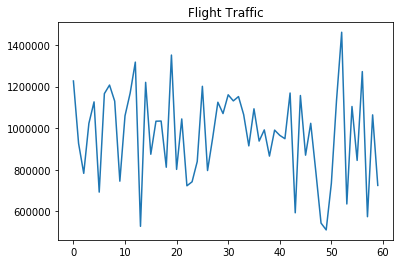

In [217]:
import pandas as pd
data[1].plot(title="Flight Traffic")

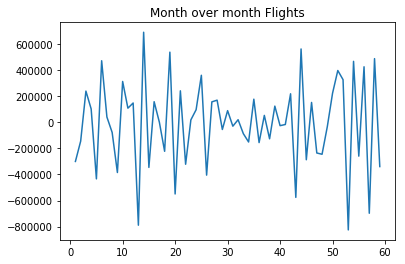

In [218]:
data2 = data[1]
data_diff = data2.diff().dropna()
data_diff.plot(title="Month over month Flights");

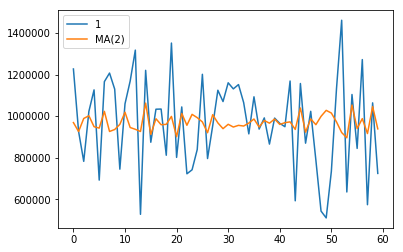

In [221]:
from statsmodels.tsa.arima_model import ARMA
arma = ARMA(data[1].values, order=(0, 2))
arma_model = arma.fit()
data["MA(2)"] = arma_model.fittedvalues
data[[1, "MA(2)"]].plot();

In [226]:
arma_model.predict(start=73)

array([1004527.65270987,  951951.13256901,  969041.86666667,
        969041.86666667,  969041.86666667,  969041.86666667,
        969041.86666667,  969041.86666667,  969041.86666667,
        969041.86666667,  969041.86666667,  969041.86666667,
        969041.86666667,  969041.86666667])

In [219]:
from statsmodels.tsa.stattools import adfuller

In [220]:
result = adfuller(data_diff.values)
result[1] # p-value

1.1271956424312063e-08

In [187]:
adfuller(data[1].values)[1]

6.732637850233903e-05

In [189]:
from statsmodels.tsa.stattools import arma_order_select_ic
result = arma_order_select_ic(data2.values, ic='aic')
result.aic_min_order

/anaconda3/envs/dssb/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/envs/dssb/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/envs/dssb/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inte

(3, 2)

In [191]:
arima = ARIMA(data2.values, order=(3,1,2))
arima_model = arima.fit()

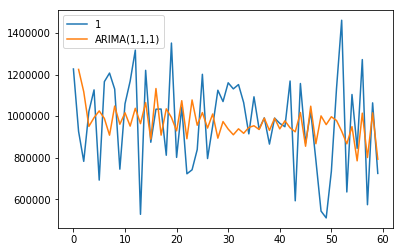

In [192]:
fitted_values = arima_model.predict(typ='levels')
# we again end up with a shorter time series as some values are used to initialize the model
fill_values = [np.NaN]*(len(data)-len(fitted_values))
data["ARIMA(1,1,1)"] = np.hstack([fill_values, fitted_values])
data[[1, "ARIMA(1,1,1)"]].plot()

In [200]:
fitted_values = arima_model.predict(typ='levels')
data['arima'] = fitted_values

ValueError: Length of values does not match length of index

In [194]:
data.shape

(60, 3)

In [197]:
arima_model.predict(start=61,end=73)

array([ 304579.10470132, -205376.75041149,  148865.8883937 ,
       -123055.99703066,   87795.80785277,  -68910.2249287 ,
         49084.30714981,  -40736.8199449 ,   26997.82931366,
        -24062.69351053,   14571.89038294,  -14620.89183862,
          7418.42349378,   -9234.76499658])

In [198]:
pd.DataFrame(arima_model.predict(start=num_observations, end= num_observations + 11))

,0
0,304579.104701
1,-205376.750411
2,148865.888394
3,-123055.997031
4,87795.807853
5,-68910.224929
6,49084.307150
7,-40736.819945
8,26997.829314
9,-24062.693511


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data2.index, data2)
plt.plot(data2.index, data2['HoltWinters'])
plt.plot(preds.index, preds[0])

In [91]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [126]:
hw = ExponentialSmoothing(data[1].values, seasonal='add',seasonal_periods=4)

In [127]:
hw_model = hw.fit()
data['HoltWinters'] = hw_model.fittedvalues

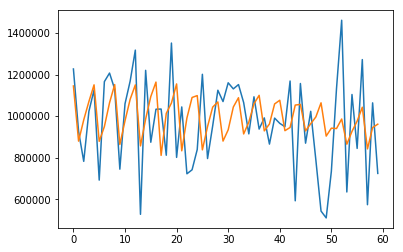

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data.index, data[1])
plt.plot(data.index, data['HoltWinters'])

In [129]:
num_observations = data.shape[0]

In [130]:
predictions = hw_model.predict(start=num_observations, end= num_observations + 11)
predictions

array([1062521.5530774 ,  804796.68207567,  954544.57554455,
        955254.43091074, 1062521.5530774 ,  804796.68207567,
        954544.57554455,  955254.43091074, 1062521.5530774 ,
        804796.68207567,  954544.57554455,  955254.43091074])

In [131]:
for i in predictions.round():
    print(int(i))

1062522
804797
954545
955254
1062522
804797
954545
955254
1062522
804797
954545
955254


In [132]:
preds = pd.DataFrame(predictions, index=range(num_observations+1, num_observations +13))

In [133]:
preds

,0
61,1.062522e+06
62,8.047967e+05
63,9.545446e+05
64,9.552544e+05
65,1.062522e+06
66,8.047967e+05
67,9.545446e+05
68,9.552544e+05
69,1.062522e+06
70,8.047967e+05


In [134]:
1563178
1312558
1312558
1388316
1325942
1312550
587396
1293945
1061128
590392
1092215
1446327

1446327

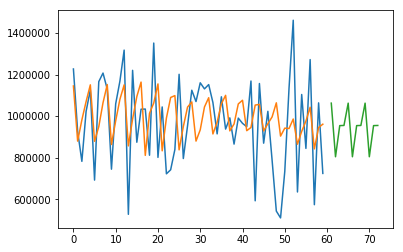

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data.index, data[1])
plt.plot(data.index, data['HoltWinters'])



### Real data

In [207]:
real_data = pd.DataFrame([1563178,
1312558,
1312558,
1388316,
1325942,
1312550,
587396,
1293945,
1061128,
590392,
1092215,
1446327], index=range(61, 73))

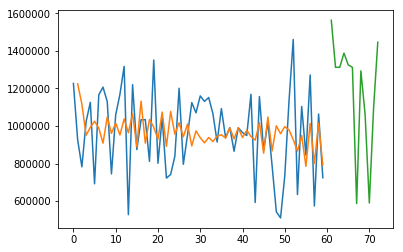

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data.index, data[1])
plt.plot(data.index, data['ARIMA(1,1,1)'])
plt.plot(real_data.index, real_data[0])

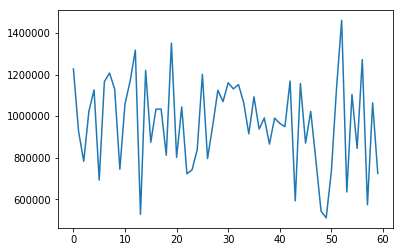

In [203]:
data2.plot()

### Solutions

In [227]:
import numpy
import scipy.interpolate
import random

n = input()
months=[]
for i in range(int(n)):
	l = input()
	l_l = l.split(' ')
	months.append(l_l[1])

num =[]
for i in months:
	b = int(i)
	num.append(b)

# create some normally distributed values and make a histogram
a = numpy.array(num)
counts, bins = numpy.histogram(a, bins=10, density=True)
cum_counts = numpy.cumsum(counts)
bin_widths = (bins[1:] - bins[:-1])

# generate more values with same distribution
x = cum_counts*bin_widths
y = bins[1:]
inverse_density_function = scipy.interpolate.interp1d(x, y)
b = numpy.zeros(n+12)

for i in range(len( b )):
    u = random.uniform( x[0], x[-1] )
    b[i] = inverse_density_function( u )

    
solution=[]
for i in range(12):
    u = random.uniform( x[0], x[-1] )
    solution.append(inverse_density_function(u))

for i in solution:
	print (i)

31
31


IndexError: list index out of range

In [253]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA

data_flight_passengers = data[1]

data_flight_passengers = map(float, data_flight_passengers)

predictions = list()

# print data_flight_passengers
predictions = list()
series = Series(data_flight_passengers)

bias=1164767.0

model = ARIMA(series.values, order=(6,2,0))
model_fit = model.fit(trend = 'nc', disp = 0)
forecast = bias + model_fit.predict(start = 60, end = 71)

for value in forecast:
    print (int(value))

1677340
837544
1326886
1131190
1114160
1290669
996961
1320148
1036537
1274212
1081364
1215074
